# Exploratory Data Analysis

## Importing Libraries

In [58]:
#Preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from pylab import rcParams
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings


from scipy import stats
from scipy.stats import norm, skew #for some statistics

## Loading Dataset

In [59]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')
riders = pd.read_csv('Riders.csv')

In [60]:
#Displaying the dataframes
display(train.head())
display(test.head())
display(variables.head())
display(riders.head())

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [61]:
display(train.info())
display(test.info())
display(riders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


None


Too many null values in 'Precipitation' , only 552 rows are not nulls. This row should be dropped. 'Temperature' has a considerable amoubt of nulls 4366 exactly. We can keep it and try to see if we can impute values or use it as is.

### First lets merge the riders/train, and the riders/test 


In [62]:
train = pd.merge(train, riders, on='Rider Id', how='left')
test = pd.merge(test, riders, on='Rider Id', how='left')

In [63]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [64]:
# checking for columns in train set and not in test set
for col in train.columns:
    if col not in test.columns:
        print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [65]:
#The description of the column
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


### Lets start with the dependant variable: 'Time from Pickup to Arrival'

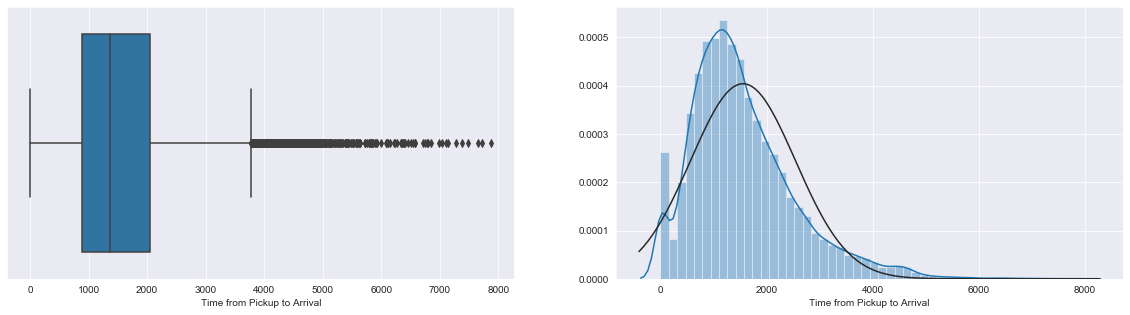

In [66]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(train["Time from Pickup to Arrival"], ax=ax[0])
sns.distplot(train["Time from Pickup to Arrival"], fit=norm, ax=ax[1])

The predicted variable is skewed to the left thus not ideal for linear models since they work best with normally distributed data.
We can normalize the data but we choose not to do so until the data is fitted with other models.

### Temperature histogram

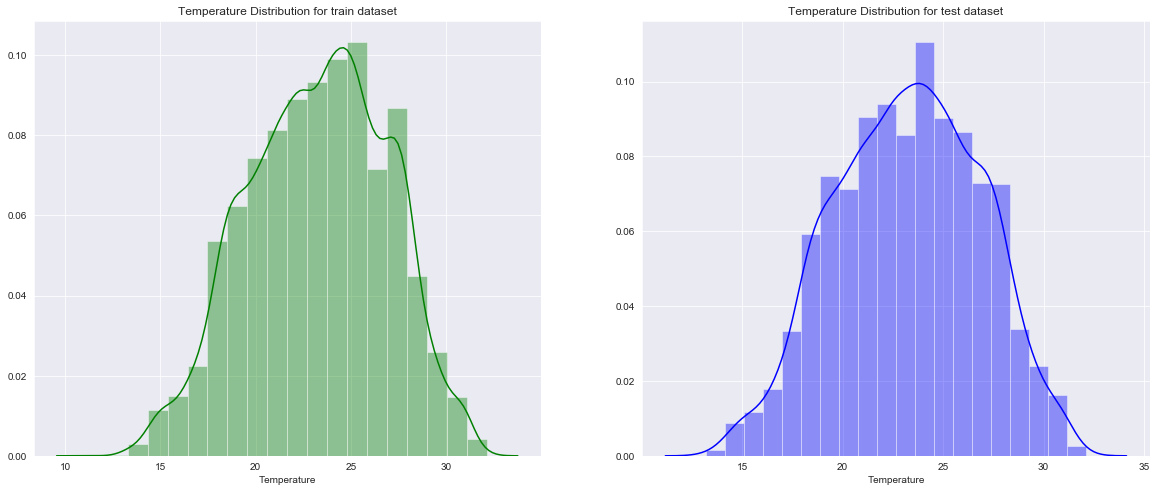

In [67]:
# Addressing the NaN values in the Temperature column
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Temperature Distribution for train dataset')
ax[1].set_title('Temperature Distribution for test dataset')
sns.distplot(train['Temperature'], bins=20, ax=ax[0], color='green')
sns.distplot(test['Temperature'], bins=20, ax=ax[1], color = 'blue')

The most common temperature is around 25 degrees in Celsius for both datasets. This makes it easy for us to impute the average temperature onto all null values.

### Platform Types

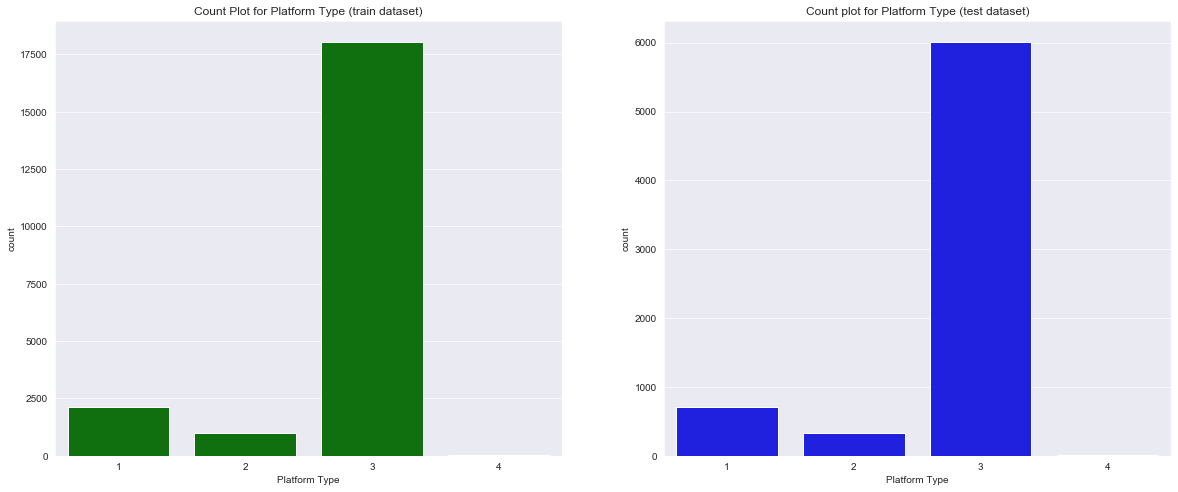

In [68]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Platform Type (train dataset)')
ax[1].set_title('Count plot for Platform Type (test dataset)')
sns.countplot(x = 'Platform Type', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Platform Type', data = test, color = 'blue', ax=ax[1])

### Personal or Business

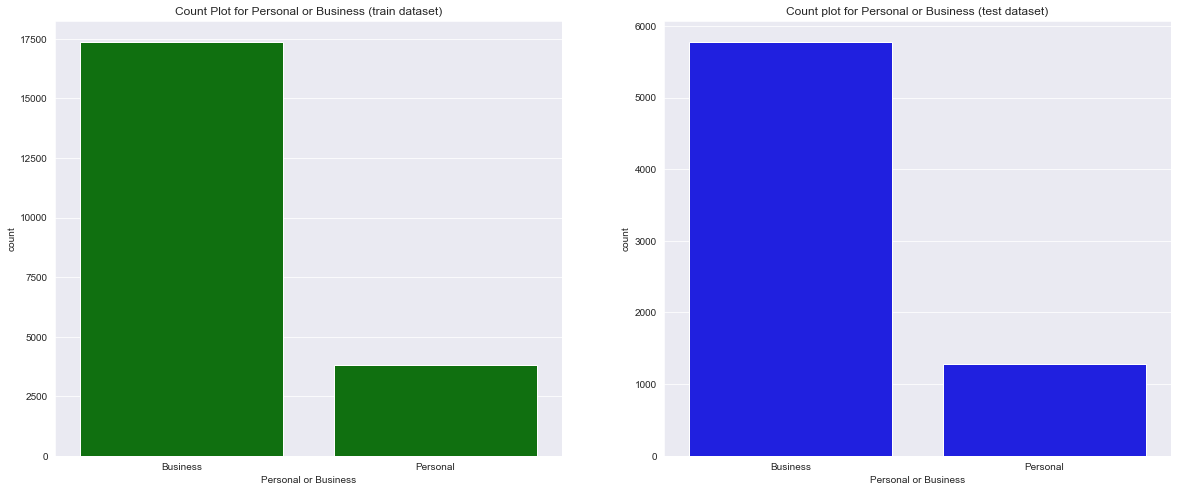

In [69]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Personal or Business (train dataset)')
ax[1].set_title('Count plot for Personal or Business (test dataset)')
sns.countplot(x = 'Personal or Business', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Personal or Business', data = test, color = 'blue', ax=ax[1])

### Arrival at Pickup Day of Month

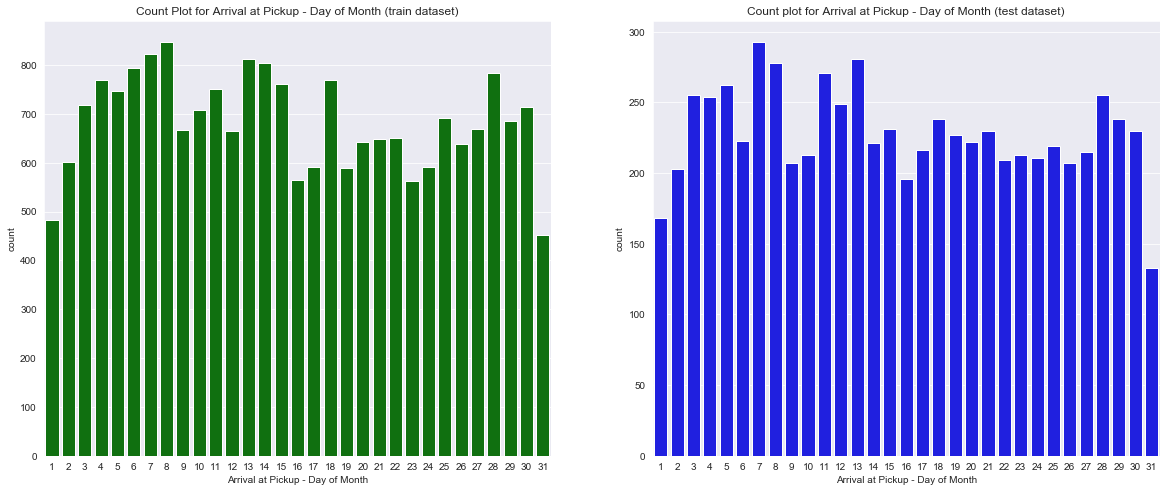

In [70]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Arrival at Pickup - Day of Month (train dataset)')
ax[1].set_title('Count plot for Arrival at Pickup - Day of Month (test dataset)')
sns.countplot(x = 'Arrival at Pickup - Day of Month', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Arrival at Pickup - Day of Month', data = test, color = 'blue', ax=ax[1])

### Arrival at Pickup Weekday

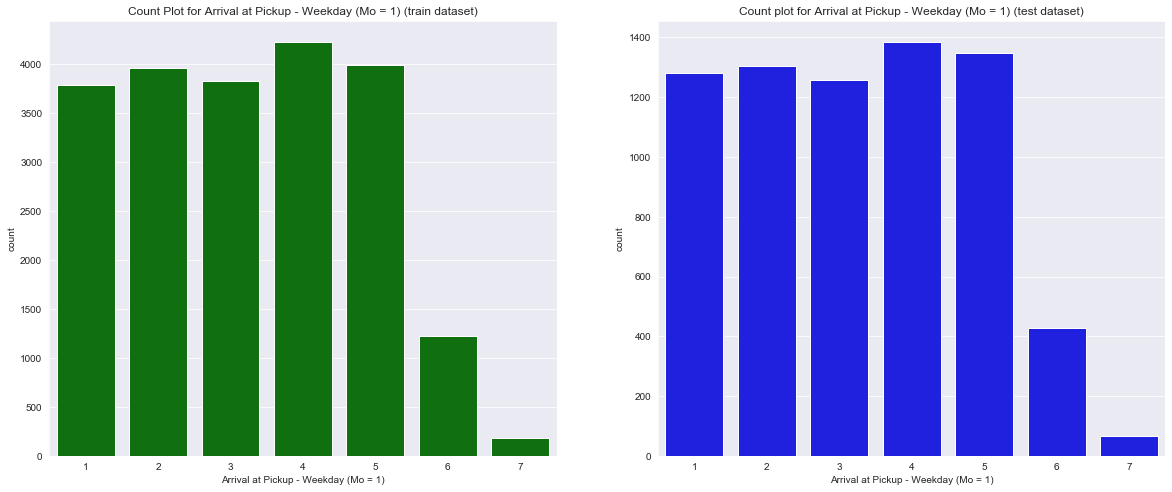

In [71]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Arrival at Pickup - Weekday (Mo = 1) (train dataset)')
ax[1].set_title('Count plot for Arrival at Pickup - Weekday (Mo = 1) (test dataset)')
sns.countplot(x = 'Arrival at Pickup - Weekday (Mo = 1)', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Arrival at Pickup - Weekday (Mo = 1)', data = test, color = 'blue', ax=ax[1])

So according to our visualization, the weekend is less busy compared to the other week days. This was expected.

### Lets extract the hour/minute/seconds from the Arrival and Pickup Time features

In [72]:
# # Converting to datetime and hour/minute/second extraction
train['Pickup_Hour'] = pd.to_datetime(train['Pickup - Time']).dt.hour
train['Pickup_Minutes'] = pd.to_datetime(train['Pickup - Time']).dt.minute
train['Pickup_Seconds'] = pd.to_datetime(train['Pickup - Time']).dt.second
train['Arrival_Destination_Hour'] = pd.to_datetime(train['Arrival at Destination - Time']).dt.hour
train['Arrival_Destination_Minutes'] = pd.to_datetime(train['Arrival at Destination - Time']).dt.minute
train['Arrival_Destination_Seconds'] = pd.to_datetime(train['Arrival at Destination - Time']).dt.second

#### Let us plot the hours at pickup

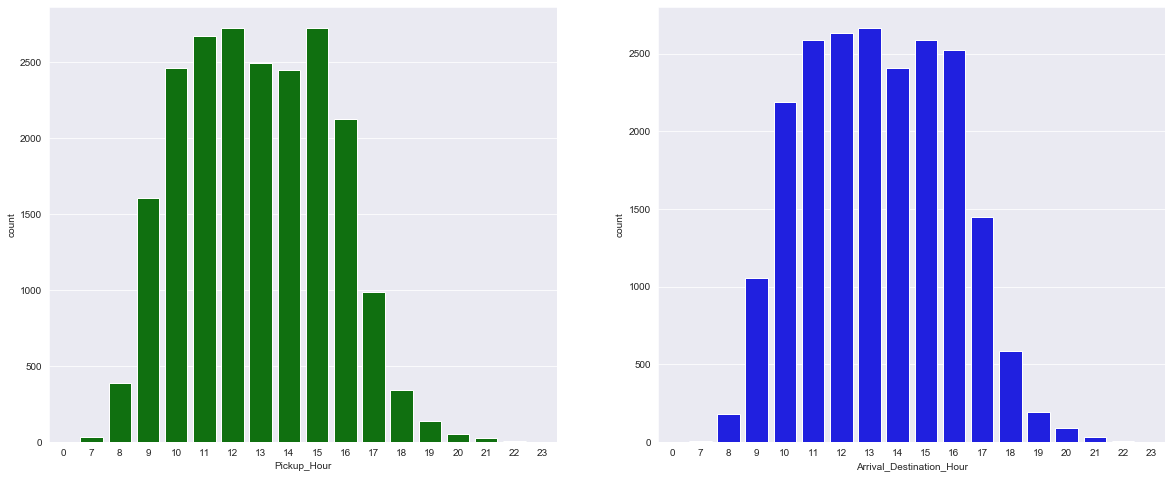

In [77]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x = 'Pickup_Hour', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Arrival_Destination_Hour', data = train, color = 'blue', ax=ax[1])

The usual pickup hours are from 9 AM till at about 5 PM, heavily concentrated during business hours. The destination Arrival hours seems to match the Pickup Hours

### The most important variable : Distance (KM)

In [78]:
train[['Distance (KM)','Time from Pickup to Arrival']].corr()

,Distance (KM),Time from Pickup to Arrival
Distance (KM),1.000000,0.580608
Time from Pickup to Arrival,0.580608,1.000000


Distance and travel time are highly correlated. Distance will definitely play a huge role in predicting the target variable.

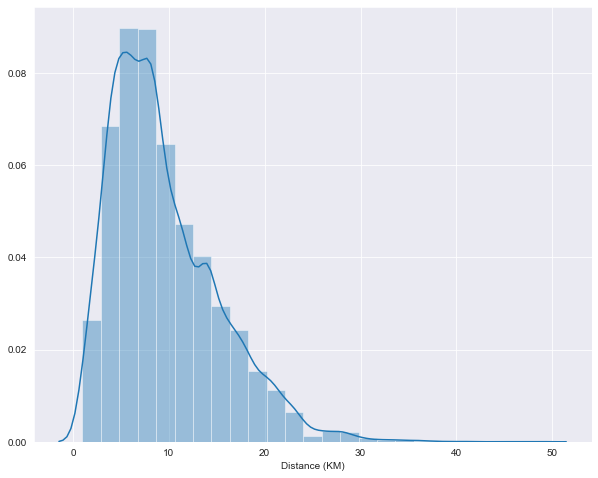

In [79]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(train['Distance (KM)'], bins = 25)

Most of the rides are under 15 KM

### Let's create a feature called 'Speed'


Something useful we could do, is to generate a feature 'Speed' of each order. Set up a threshold of acceptable speed of a bike, and eliminate the possible outliers later. Lets generate it.

Breaking down distance to meters and keep time in seconds, and convert it to minutes

In [80]:
train['Speed_Meter_per_Second'] = (train['Distance (KM)']*1000)/train['Time from Pickup to Arrival'] ##meter per second

train['Speed_Meter_per_Second'].describe()

count    21201.000000
mean        69.251494
std        529.249252
min          0.255624
25%          4.573171
50%          6.406834
75%          8.413462
max      17000.000000
Name: Speed_Meter_per_Second, dtype: float64

There's definitely outliers. Look at the maximum speed (impossible). If not addressed they will affect the performance of our models negatively. However, great care has to be taken when removing outliers because the test data might contain these outliers and our models might not deal accordingly with such.

#### Outlier Free Speed

Speed's distribution when outliers are excluded from the data.

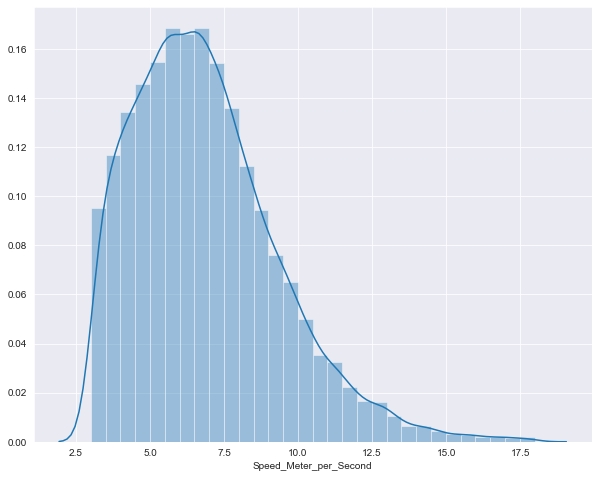

In [81]:
# Cut-off threshold range = 3m/s < speed < 18m/s
Outliers_Train = train[(train['Speed_Meter_per_Second'] >= 18)|(train['Speed_Meter_per_Second'] <= 3)]
OutlierFree_Train = train[~(train['Order No'].isin(Outliers_Train['Order No']))]
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(OutlierFree_Train['Speed_Meter_per_Second'], bins = 30)

In [82]:
OutlierFree_Train['Speed_Meter_per_Second'].describe()

count    18153.000000
mean         6.871560
std          2.461701
min          3.000158
25%          5.025126
50%          6.550218
75%          8.259587
max         17.988553
Name: Speed_Meter_per_Second, dtype: float64

Do the train and test sets share the same riders? lets see.

In [87]:
print('Number of unique riders in train set : %i and in test set : %i '%(len(train['Rider Id'].unique()),len(test['Rider Id'].unique())))

Number of unique riders in train set : 924 and in test set : 822 


In [88]:
riders_train_only = len(train[~(train['Rider Id'].isin(test['Rider Id'].unique()))]['Rider Id'].unique())
riders_test_only = len(test[~(test['Rider Id'].isin(train['Rider Id'].unique()))]['Rider Id'].unique())
print('Number of riders existing only in trainset? %i ; Number of riders only in test set? %i ' %(riders_train_only,riders_test_only))

Number of riders existing only in trainset? 130 ; Number of riders only in test set? 28 


#### Age binning

In [90]:
train['Age_Year'] = train['Age'] / 365
train['Age_Month'] = train['Age'] / 30
train['Age_Year'] = round(train['Age_Year'])
train['Age_Month'] = round(train['Age_Month'])

#### Rush hours

In [91]:
train.loc[(train['Pickup_Hour'] >= 7) & (train['Pickup_Hour'] < 9),'DayTime'] = 'Rush_Hour1'
train.loc[(train['Pickup_Hour'] >= 9) & (train['Pickup_Hour'] <= 11),'DayTime'] =  'Dawn'
train.loc[(train['Pickup_Hour'] > 11) & (train['Pickup_Hour'] <= 13),'DayTime'] = 'Noon'
train.loc[(train['Pickup_Hour'] > 13) & (train['Pickup_Hour'] < 17),'DayTime'] = 'Afternoon'
train.loc[(train['Pickup_Hour'] >= 17) & (train['Pickup_Hour'] <= 19),'DayTime'] = 'Rush_Hour2'
train.loc[(train['Pickup_Hour'] > 19) & (train['Pickup_Hour'] < 7),'DayTime'] = 'Night'

### Category plots

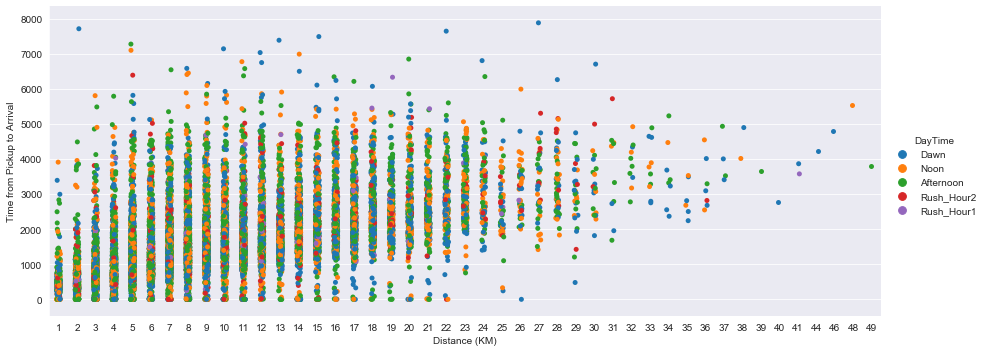

In [92]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="DayTime",
                   data=train, aspect=2.5, height=5, ci=80.0)

In [93]:
def weekend(x):
    if x not in (6,7):
        x=0
    else:
        x=1
    return(x)

In [94]:
train['Weekend'] = train['Arrival at Pickup - Weekday (Mo = 1)'].apply(weekend)

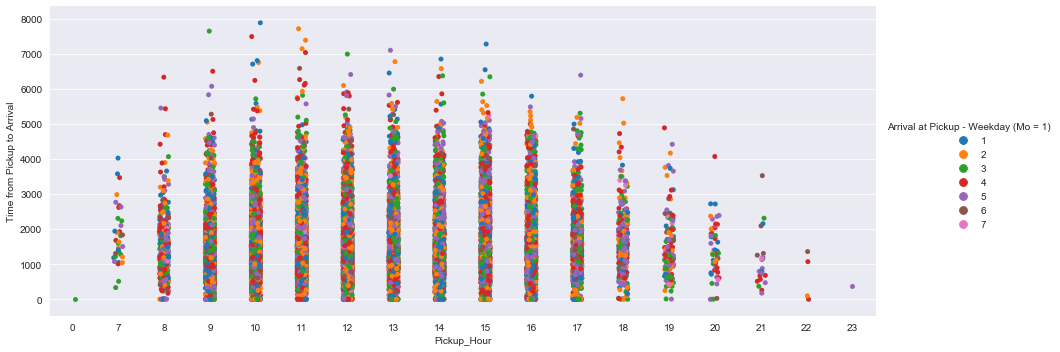

In [95]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

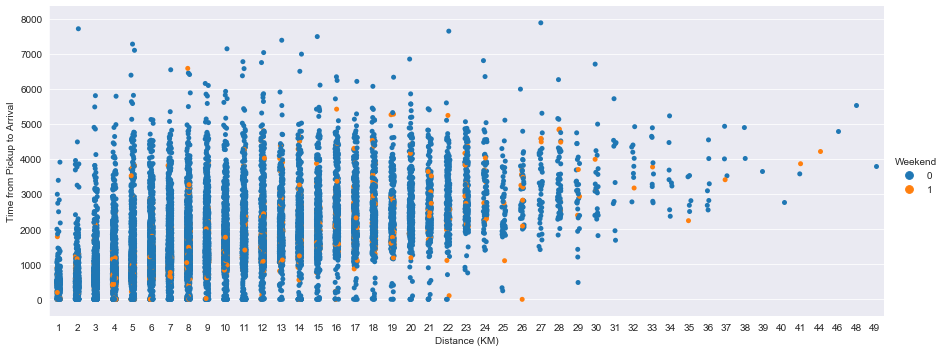

In [102]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Weekend",
                   data=train, aspect=2.5, height=5, ci=80)

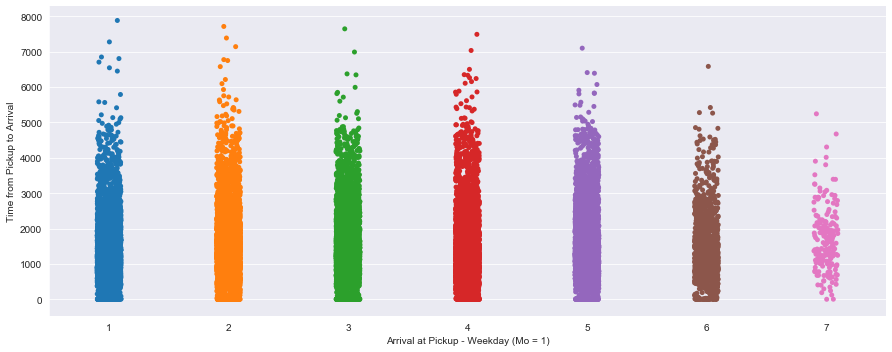

In [97]:
g = sns.catplot(x="Arrival at Pickup - Weekday (Mo = 1)", y="Time from Pickup to Arrival",
                   data=train, aspect=2.5, height=5, ci=80.0)

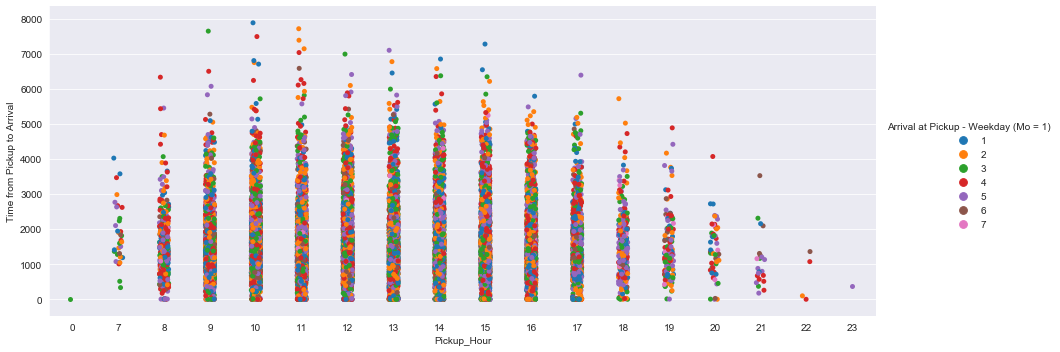

In [98]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

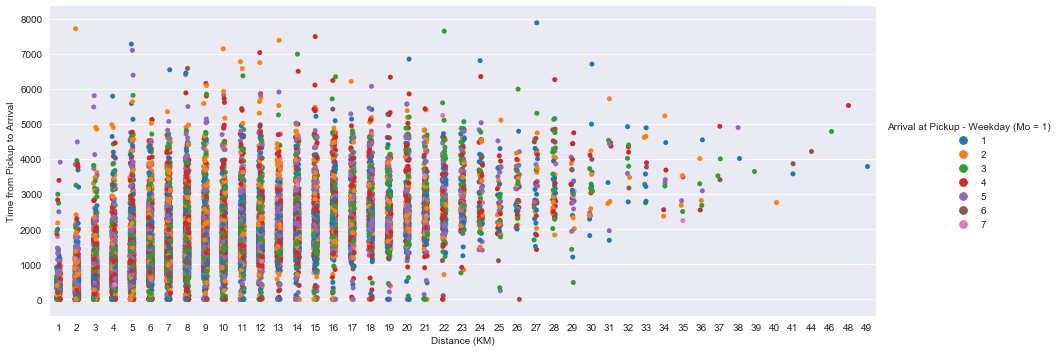

In [99]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

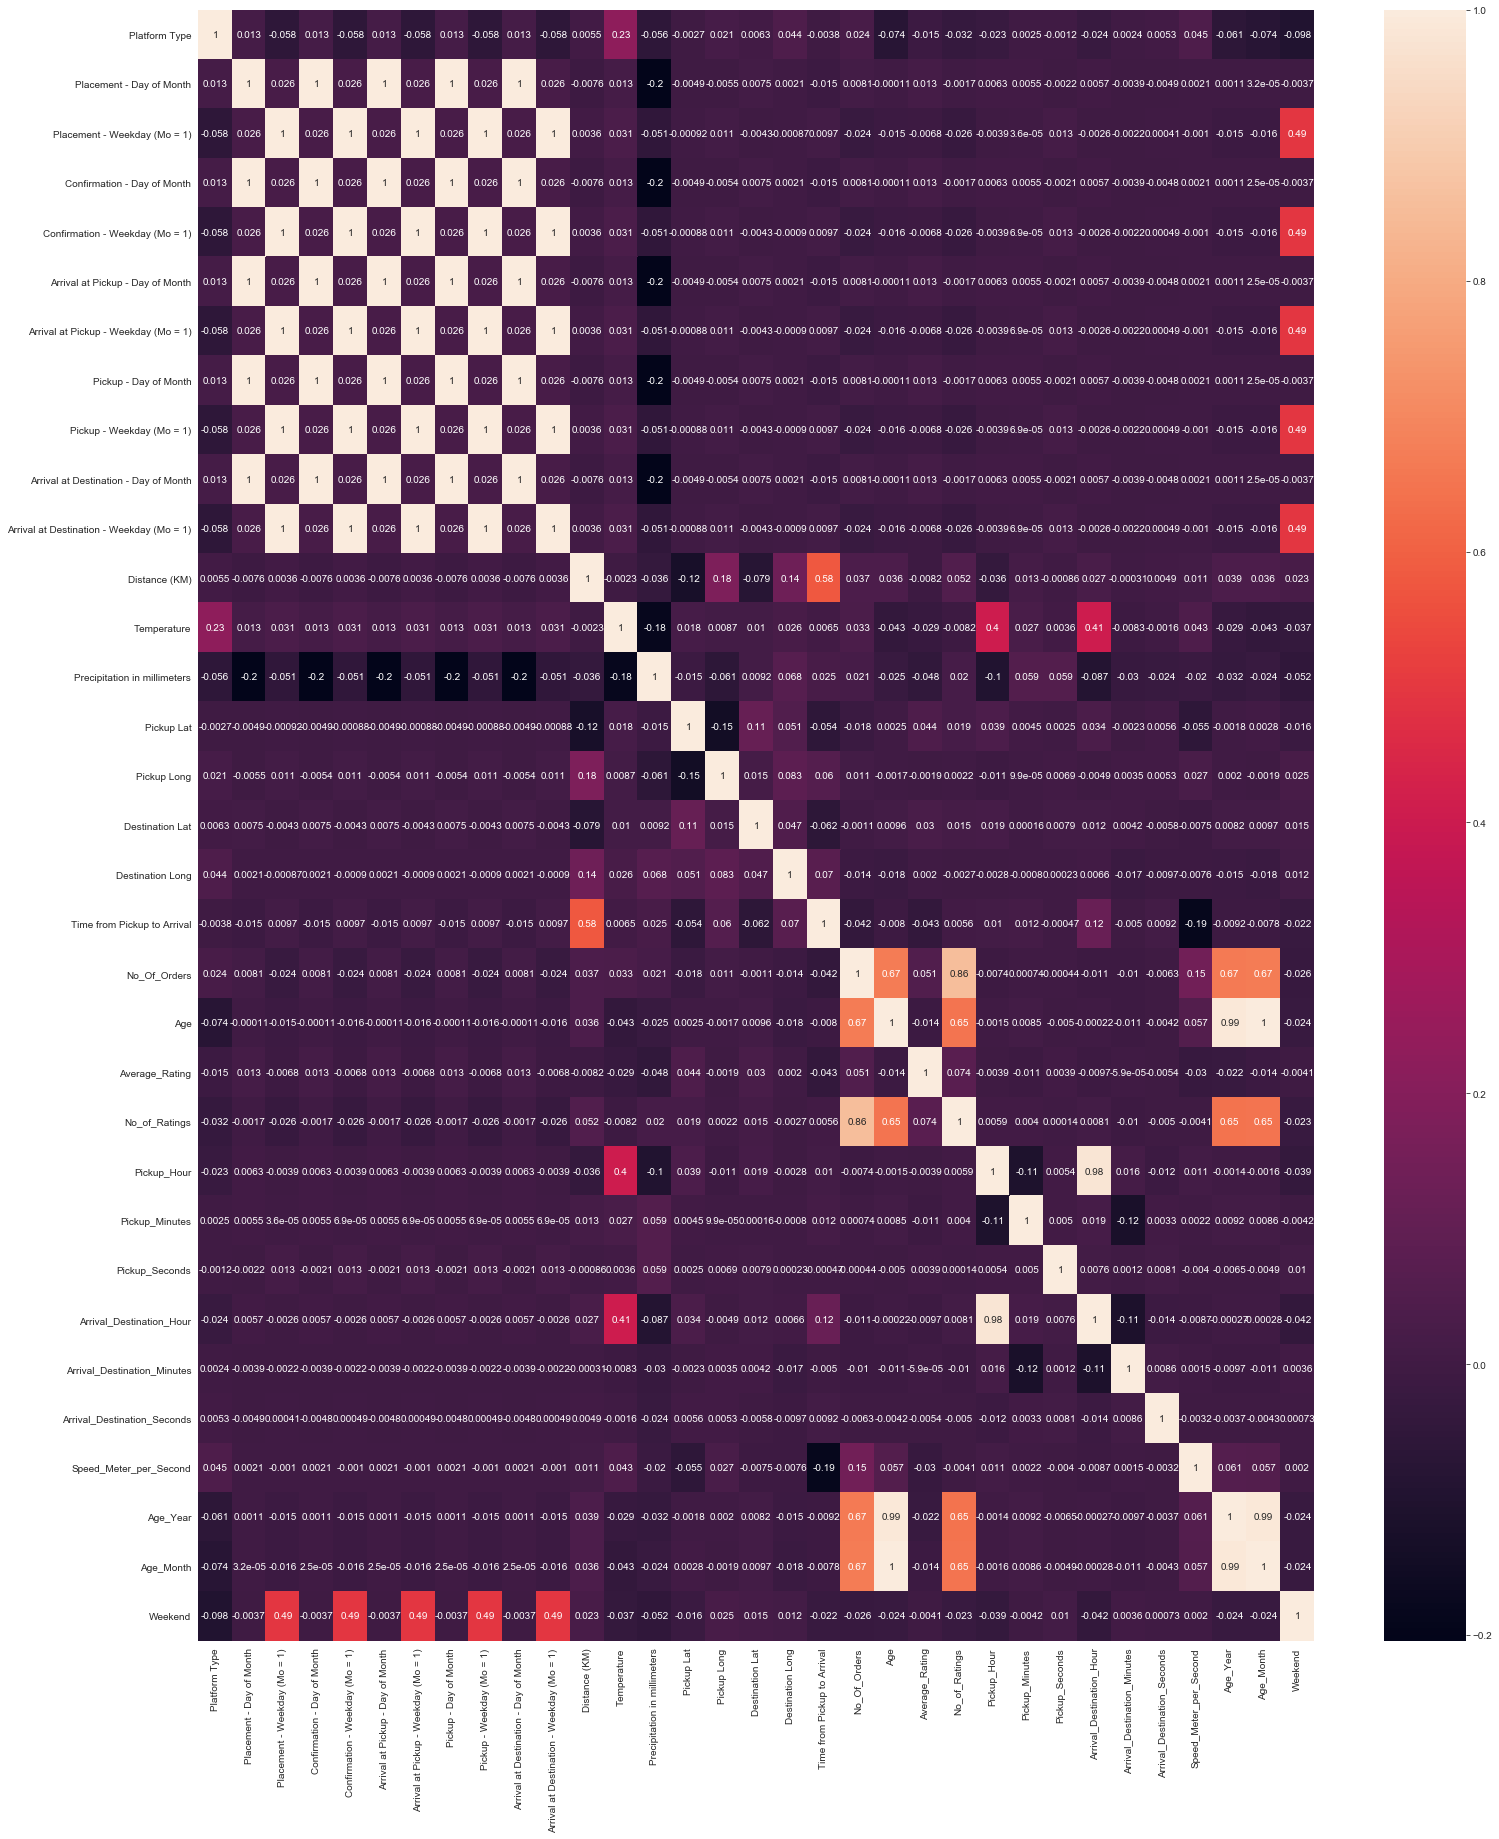

In [101]:
corrmat = train.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
rcParams['figure.figsize'] = 25, 30
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True)